In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dense, Flatten
import cv2
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
import seaborn as sns

In [2]:
y_vals = {'Brad Pitt' : 0, 'Hugh Jackman' : 1, 'Johnny Depp' : 2, 'Leonardo DiCaprio' : 3, 'Robert Downey Jr' : 4, 'Tom Cruise' : 5, 'Tom Hanks' : 6, 'Will Smith' : 7}

In [6]:
import os

dataset_dir = r"D:\Balance\College and Studies\TY\CV & DL Lab\CVDL Dataset\Face_recognition\Celebrity Faces Dataset"

# Get the class (folder) names
class_names = sorted(os.listdir(dataset_dir))

print(f"Number of classes: {len(class_names)}")
print("Class names:", class_names)


Number of classes: 8
Class names: ['Brad Pitt', 'Hugh Jackman', 'Johnny Depp', 'Leonardo DiCaprio', 'Robert Downey Jr', 'Tom Cruise', 'Tom Hanks', 'Will Smith']


In [7]:
dir_to_find = r"D:\Balance\College and Studies\TY\CV & DL Lab\CVDL Dataset\Face_recognition\Celebrity Faces Dataset"
base_path = './Face_recognition'

# Join paths correctly
full_path = os.path.join(base_path, dir_to_find)

labels = os.listdir(full_path)  # Correctly formed path
print(labels)

x = []
y = []

# Assuming y_vals is a dictionary mapping labels to their respective values
y_vals = {label: idx for idx, label in enumerate(labels)}

for label in labels:
    label_path = os.path.join(full_path, label)  # Correctly join paths
    print(label)
    for image_file in os.listdir(label_path):
        image_path = os.path.join(label_path, image_file)  # Correctly join paths
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is not None and img.shape[0] >= 300 and img.shape[1] >= 300:
            img = cv2.resize(img, (200, 200), interpolation=cv2.INTER_LINEAR)
            x.append(img)
            y.append(y_vals[label])

x = np.array(x)
y = np.array(y)


['Brad Pitt', 'Hugh Jackman', 'Johnny Depp', 'Leonardo DiCaprio', 'Robert Downey Jr', 'Tom Cruise', 'Tom Hanks', 'Will Smith']
Brad Pitt
Hugh Jackman
Johnny Depp
Leonardo DiCaprio
Robert Downey Jr
Tom Cruise
Tom Hanks
Will Smith


In [8]:
def show_img(x, y):
    plt.gray()
    plt.title(str(y))
    plt.imshow(x)

In [9]:
np.save('./face_reg.npy' , x)
np.save('./face_reg_labels.npy' , y)

In [10]:
X_train = np.load('./face_reg.npy')
y_train = np.load('./face_reg_labels.npy')

In [11]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000)

In [12]:
def splits(dataset, TRAIN_RATIO = 0.8, VAL_RATIO = 0.15, TEST_RATIO = 0.05):
    DATASET_SIZE = len(dataset)

    train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE)).map(lambda x, y: 
        (
            tf.reshape(x , (200 , 200 , 1)) 
            , y
        )
    ).batch(32)

    val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))

    val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE)).map(lambda x, y: 
        (
            tf.reshape(x , (200 , 200 , 1)) 
            , y
        )
    ).batch(32)

    test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE)).map(lambda x, y: 
        (
            tf.reshape(x , (200 , 200 , 1)) 
            , y
        )
    )
    return train_dataset, val_dataset, test_dataset

In [13]:
train_ds , val_ds , test_ds = splits(dataset)

In [14]:
model = Sequential([
    Conv2D(filters = 16, kernel_size = (3 , 3), strides = 1, padding = 'same', activation = 'relu', input_shape = (200, 200, 1)),
    MaxPool2D(pool_size = (2 , 2), strides = 2),
    
    Conv2D(filters = 32, kernel_size = (3 , 3), strides = 1, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2 , 2), strides = 2),

    Conv2D(filters = 64, kernel_size = (3 , 3), strides = 1, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2 , 2), strides = 2),
    
    Flatten(),
    Dense(8, activation = 'softmax')
])

D:\Balance\College and Studies\TY\CV & DL Lab\Practice\test_venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_ds, validation_data = val_ds, epochs=20)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.1324 - loss: 47.5881 - val_accuracy: 0.2301 - val_loss: 2.0439
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.2082 - loss: 2.0145 - val_accuracy: 0.3982 - val_loss: 1.7342
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.4263 - loss: 1.6905 - val_accuracy: 0.7345 - val_loss: 1.0479
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.6532 - loss: 1.1682 - val_accuracy: 0.8319 - val_loss: 0.6955
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.7970 - loss: 0.6874 - val_accuracy: 0.9469 - val_loss: 0.3380
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.9256 - loss: 0.3497 - val_accuracy: 0.9646 - val_loss: 0.2887
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.9695 - loss: 0.1893 - val_accuracy: 0.9912 - val_loss: 0.0568
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.9973 - loss: 0.0621 - val_accuracy: 1

class = 0 conf= 0.999288


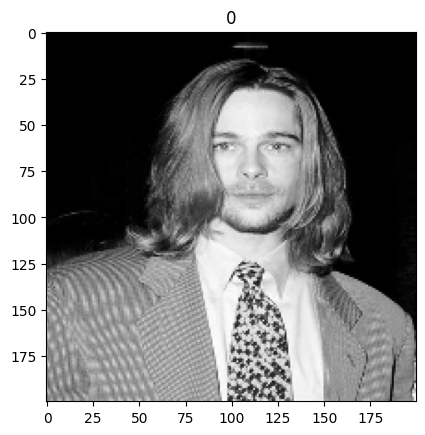

In [18]:
for x, y in test_ds.shuffle(1000).as_numpy_iterator():
    show_img(x , y)
    x = x.reshape(1, 200, 200, 1)
    predictions = model.predict(x, verbose=0)
    # Get predicted class and confidence
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]
    print('class =', predicted_class, 'conf=' , confidence)
    break

In [19]:
model.save('face_reg.keras')

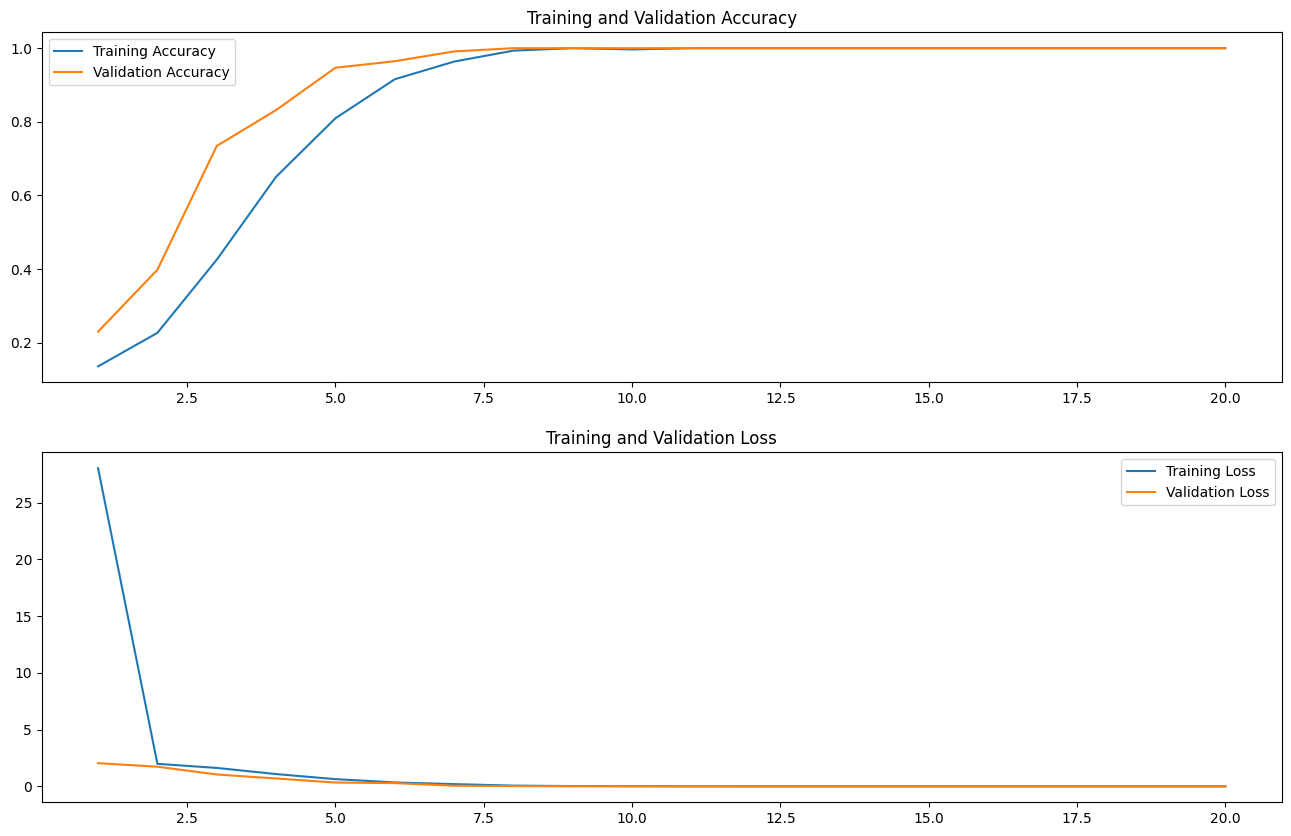

In [20]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.plot(range(1, 20+1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, 20+1), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.subplot(2,1,2)
plt.plot(range(1, 20+1), history.history['loss'], label='Training Loss')
plt.plot(range(1, 20+1), history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(["Training Loss","Validation Loss"])
plt.show()

In [21]:
y_true = []
y_pred = []

for x, y in test_ds.as_numpy_iterator():  # Iterate through the test dataset
    y_true.append(y.item())   # Collect true labels
    x = x.reshape(1, 200, 200, 1)
    predictions = model.predict(x)  # Predict on the batch
    y_pred.append(np.argmax(predictions, axis=1)[0].item())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [22]:
y_true = np.array(y_true)
y_pred = np.array(y_pred) 

Confusion Matrix:
[[2 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0]
 [0 0 0 7 0 0 0 0]
 [0 0 0 0 4 0 0 0]
 [0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 7]]
F1 Score: 1.0
Recall: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         7

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



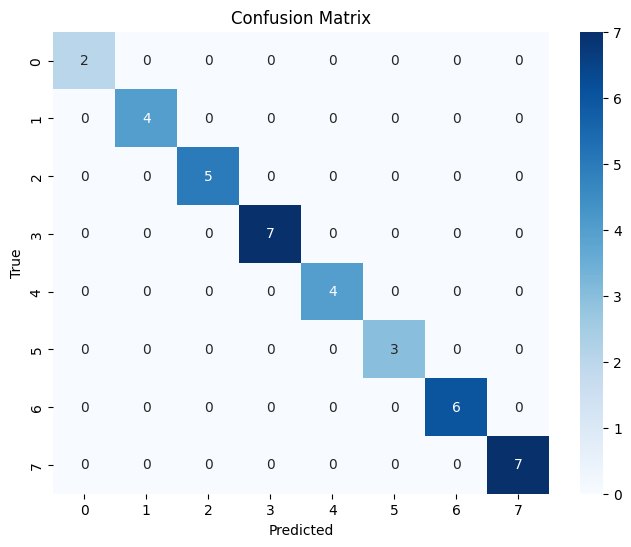

In [23]:
conf_matrix = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')  # Weighted F1-score
recall = recall_score(y_true, y_pred, average='weighted')  # Weighted Recall

# Print metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Step 3: Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()